In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 11 11:13:04 2017


The goal of this script is to identify the hand written numbers zero through nine.

This script takes the data from the Kaggle MNIST Competition (https://www.kaggle.com/c/digit-recognizer/data)
which is two CSV files.  The data files train.csv and test.csv contain gray-scale images of 
hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in 
width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with 
it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This 
pixel-value is an integer between 0 and 255, inclusive. The training data set, (train.csv), has 
785 columns. The first column, called "label", is the digit that was drawn by the user. The rest 
of the columns contain the pixel-values of the associated image.



@author: ptm
"""

%matplotlib inline
# this line above is necessary for juptyer notebooks to plot properly

# Import libraries for numerical computations
import pandas as pd
import numpy as np
# Import libraries for plotting
import matplotlib.pyplot as plt
#import seaborn as sns
# Import libraries for image analysis
#from scipy.io import loadmat
# import scipy.io
# Import libraries for machine learning
#from scipy.special import expit #Vectorized sigmoid function
from sklearn.linear_model import LogisticRegression

# Set working directory
#import os
#os.chdir('/Users/ptm/desktop/Current_working_directory')
import os
os.chdir('/home/ubuntu')


# Load the data (from Kaggle)
data = pd.read_csv('train.csv')
testingData = pd.read_csv('test.csv')
X = data.drop("label",axis=1).values
y = data.label.values



In [2]:
# Here I begin the project by describing the shape and composition of the MNIST dataset.

def describeDataset(input):
    """
    This function describes the shape of the dataset.  
    Note that the dataset was downloaded from Exercise 3 
    of the Coursera course titled "Machine Learning"
    """
    print('')
    print("'X' shape: %s."%(X.shape,))
    print('')
    print("'y' shape: %s."%(y.shape,))
    print('')
    print("Unique elements in y: %s"%(np.unique(y)))

describeDataset(data)



'X' shape: (42000, 784).

'y' shape: (42000,).

Unique elements in y: [0 1 2 3 4 5 6 7 8 9]


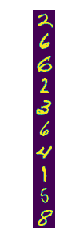

In [3]:
# Display the images.

def displayDataOne(input):
    """
    Display the data.
    """
    # Add column of 1's to X
        # This is necessary because by adding a column of ones we create the intercept term (after matrix multiplication)  
        # Y = MX + B for y = [1,X] x M but not for y = [X] x M
        # https://www.unc.edu/courses/2007spring/soci/709/001/matrixalg.pdf
    #X = data['X']
    X = data.drop("label",axis=1).values
    Xone = np.insert(X,0,1,axis=1)
    # Display the data
        # convert a row of 784 values to a 28x28 matrix
    tenImages = np.random.choice(Xone.shape[0], 10)
    plt.imshow(Xone[tenImages,1:].reshape(-1,28))
    plt.axis('off')
    return

displayDataOne(data)

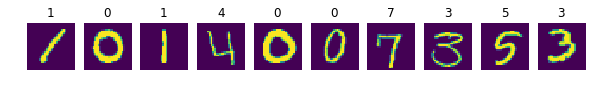

In [4]:
# Display more images.  

def displayDataTwo(input):
    """
    Displays 10 handwritten digis
    and 10 classification labels
    """
    
    figure,image = plt.subplots(1,10, figsize=(10,10))
    for i in range(10):
        image[i].imshow(X[i].reshape((28,28)))
        image[i].axis('off')
        image[i].set_title(y[i])

displayDataTwo(data)

In [5]:
# The goal is to take an image of a number and correctly identify the number. 
# I will do this with a "One vs All Classification" approach.
# There will be classification algorithms for each "label" zero through nine.
# And then each image will be assigned a "label" based on its best match.

# To do this, I will import some additional Python libraries that contain
# methods and algorithms that are helpful for machine learning applications.

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
#from sklearn.metrics import make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# We will need to split up our training data, setting aside 20%
# of the training data for cross-validation testing, such that we can avoid
# potentially overfitting the data.

##############
##############

# Load the data

data = pd.read_csv('train.csv')
testingData = pd.read_csv('test.csv')

# Limit to 50 images for debugging

#X = data.iloc[0:100,1:] # everything but the first column for the first 50 examples (pixel values)
#y = data.iloc[0:100,:1] # first column only for the first 50 examples (label/answer)

# You can remove the limit when executing the final script

X = data.iloc[0:5000,1:] # everything but the first column  (pixel values)
y = data.iloc[0:5000,:1] # first column only  (label/answer)

X_train = 0
X_test = 0
Y_train = 0
Y_test = 0
xValues = X
yValues = y.values.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2, random_state=23)

# Note that train_test_split was the simport part here where we split up the data into training and testing subsets.

##############
##############


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.794500 (0.016912)
RF: 0.878250 (0.012502)
KNN: 0.920500 (0.011057)
SVM: 0.114750 (0.012270)
LSVM: 0.819250 (0.014919)
GNB: 0.565000 (0.020187)
DTC: 0.762750 (0.016750)


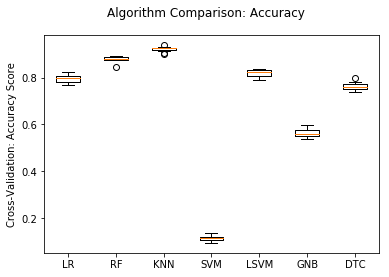


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier



In [6]:
# There are a lot of different classification algorithms to choose between.
# Let's compare nine of them.

%matplotlib inline

def compareABunchOfDifferentModelsAccuracy(input):
    """
    This function takes as an input the dataframe "trainingData" which contains the data from "data.csv".  
    The output is a table and boxplot illustrating the accuracy score for each of nine algorithms given this input.
    """    

    print('')
    print('Compare Multiple Classifiers:')
    print('')
    print('K-Fold Cross-Validation Accuracy:')
    print('')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
#    models.append(('GBC', GradientBoostingClassifier()))
#    models.append(('LDA', LinearDiscriminantAnalysis()))
        
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(X_train, Y_train)
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        accuracy_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)
   
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return

compareABunchOfDifferentModelsAccuracy(data)

def defineModels():
    """
    This function just defines each abbreviation used in the previous function (e.g. LR = Logistic Regression)
    """
    print('')
    print('LR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
#    print('GBC = GradientBoostingClassifier')
#    print('LDA = LinearDiscriminantAnalysis')
    print('')
    return

defineModels()



After binary conversion:


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.986750 (0.004191)
RF: 0.988500 (0.005268)
KNN: 0.992250 (0.004250)
SVM: 0.990000 (0.005123)
LSVM: 0.984750 (0.005056)
GNB: 0.469500 (0.035878)
DTC: 0.975000 (0.009747)


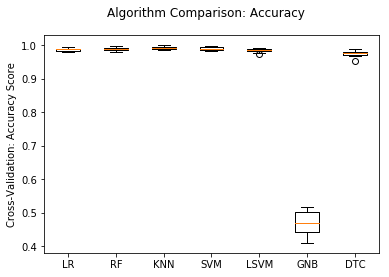


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier



In [7]:
# The score for Support Vector Machines is very low, but I know this approach should work well.
# I will try converting the images to binary form, such that there are only two possible values.

### BINARY CONVERSION

# To do this I will first re-load the data

#data = pd.read_csv('train.csv')
#testingData = pd.read_csv('test.csv')
#X = data.drop("label",axis=1).values
#y = data.label.values

# Here I do the binary conversion. SHould I use SKlearn standard scalar function instead?

data[data>0]=1
testingData[testingData>0]=1


############
############

# Here I limit sample size to a specific number images to make things easier for debugging

#X = data.iloc[0:500,1:] # everything but the first column for the first 50 examples (pixel values)
#y = data.iloc[0:500,:1] # first column only for the first 50 examples (label/answer)


# The the final script, I run using a larger training set, as shown below.

X = data.iloc[0:5000,1:] # everything but the first column  (pixel values)
y = data.iloc[0:5000,:1] # first column only  (label/answer)

##############
##############

X_train = 0
X_test = 0
Y_train = 0
Y_test = 0
xValues = X
yValues = y.values.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2, random_state=23)


print('After binary conversion:')
print('')
compareABunchOfDifferentModelsAccuracy(data)
defineModels()



In [8]:
# Good, the binary conversion helped a lot!
# Let's look at Logistic Regression,  Support Vector Machine, and K-Nearest Neighbors in more detail.  

def runLogisticRegression(a,b,c,d):
    """ Run a Logistic Regression"""  
    classifier = LogisticRegression()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('')
    print('Logistic Regression - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runLogisticRegression(X_train, Y_train, X_test, Y_test)

def runSVC(a,b,c,d):
    """ Run a SVC """
    classifier = SVC()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('')
    print('Support Vector Machine - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runSVC(X_train, Y_train, X_test, Y_test)

def runKNN(a,b,c,d):
    """ Run a KNN"""
    classifier = KNeighborsClassifier()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('')
    print('K-Nearest Neighbor Classifier - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runKNN(X_train, Y_train, X_test, Y_test)




Logistic Regression - Training set accuracy: 0.987 (0.009)


Support Vector Machine - Training set accuracy: 0.987 (0.009)


K-Nearest Neighbor Classifier - Training set accuracy: 0.994 (0.008)



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

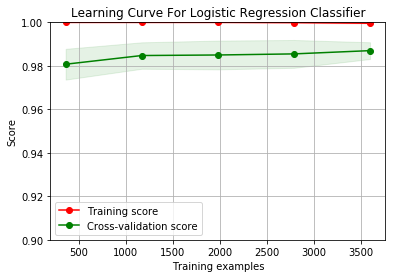

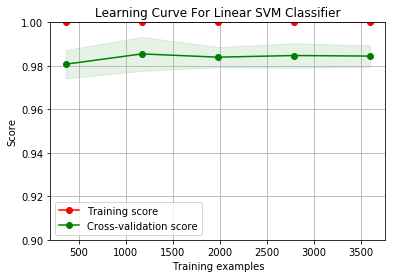

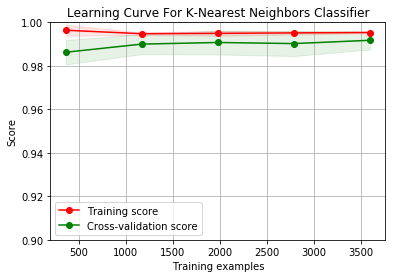

In [9]:
# Here I plot learning curves to help with the decision of which algorithm to use


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(LogisticRegression(), 'Learning Curve For Logistic Regression Classifier', X_train, Y_train, (0.9,1), 10)
plot_learning_curve(LinearSVC(), 'Learning Curve For Linear SVM Classifier', X_train, Y_train, (0.9,1), 10)
plot_learning_curve(KNeighborsClassifier(), 'Learning Curve For K-Nearest Neighbors Classifier', X_train, Y_train, (0.9,1), 10)


In [10]:
# It looks like Logistic Regression and Support Vector Machine both have high bias 
# and could improve with additional training examples.
# K-nearest neighbor might be a little bit overfit, though.
# None of the learning curves are bad enough for us to exclude any of these algorithms.


# Let's see if I can improve the score through parameter optimization.
# I will do a grid search to find the optimal parameters for each classifier.

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Optimize Parameters for LR

def selectParametersForLR(a, b, c, d):

    model = LogisticRegression()
    parameters = {'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10, 25, 50, 100],
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer, error_score = 0.01)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for LR:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Logistic Regression - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return

selectParametersForLR(X_train, Y_train, X_test, Y_test)

# Optimize Parameters for SVM

def selectParametersForSVM(a, b, c, d):

    model = SVC()
    parameters = {'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10, 25, 50, 100],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for SVM:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Linear Support Vector Machine - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return

selectParametersForSVM(X_train, Y_train, X_test, Y_test)

# Optimize Parameters for KNN

def selectParametersForKNN(a, b, c, d):

    model = KNeighborsClassifier()
    parameters = {'n_neighbors': [5, 10, 25, 50],
                  'algorithm': ['ball_tree', 'kd_tree'],
                  'leaf_size': [5, 10, 25, 50]}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for KNN:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('K-Nearest Neighbors Classifier - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return

selectParametersForKNN(X_train, Y_train,  X_test, Y_test)


Selected Parameters for LR:

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

Logistic Regression - Training set accuracy: 0.99 (0.01)

Selected Parameters for SVM:

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Linear Support Vector Machine - Training set accuracy: 0.983 (0.0100498756211)

Selected Parameters for KNN:

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

K-Nearest Neighbors Classifier - Training set accuracy: 0.99 (0.0109544511501)



In [11]:
# That worked well. But maybe we can get even higher accuracy.
# Let's try some additional algorithms now such as neural networks.


# First we will use the Multi-layer Perceptron NN model from Sklearn

from sklearn.neural_network import MLPClassifier as MLPC

def runMLPC(a,b,c,d):
    classifier = MLPC()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SKlearn Multi-layer Perceptron NN - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runMLPC(X_train, Y_train,  X_test, Y_test)

SKlearn Multi-layer Perceptron NN - Training set accuracy: 0.989 (0.00943398113206)



In [12]:
# Now let's see if we can improve the score with parameter optimization

# Optimize Parameters for MLP-NN

def selectParametersForMLPC(a, b, c, d):

    model = MLPC()
    parameters = {'verbose': [False],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'max_iter': [200, 500, 1000]}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for Multi-Layer Perceptron NN:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Multi-Layer Perceptron NN - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return

selectParametersForMLPC(X_train, Y_train,  X_test, Y_test)


Selected Parameters for Multi-Layer Perceptron NN:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Multi-Layer Perceptron NN - Training set accuracy: 0.987 (0.011)



In [13]:
# Now let's try some other neural networks

train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

#  Below is an implementation of a Tensorflow Softmax Regression NN

    

"""
https://www.tensorflow.org/get_started/mnist/beginners
https://www.kaggle.com/raresbarbantan/mnist-tensorflow
"""


def tensorFlowSoftMax(a,b):
    #print("Training set has {0[0]} rows and {0[1]} columns".format(a.shape))
    #print("Test set has {0[0]} rows and {0[1]} columns".format(b.shape))
    class Dataset(object):
        def __init__(self, data):
            self.rows = len(data.values)
            self.images = data.iloc[:,1:].values
            self.images = self.images.astype(np.float32)
            self.images = np.multiply(self.images, 1.0 / 255.0)
            self.labels = np.array([np.array([int(i == l) for i in range(10)]) for l in data.iloc[:,0].values]) #one-hot
            self.index_in_epoch = 0
            self.epoch = 0
        def next_batch(self, batch_size):
            start = self.index_in_epoch
            self.index_in_epoch += batch_size
            if self.index_in_epoch > self.rows:
                self.epoch += 1
                perm = np.arange(self.rows)
                np.random.shuffle(perm)
                self.images = self.images[perm]
                self.labels = self.labels[perm]
                #next epoch
                start = 0
                self.index_in_epoch = batch_size
            end = self.index_in_epoch
            return self.images[start:end] , self.labels[start:end]
    
    import tensorflow as tf
    x = tf.placeholder(tf.float32, [None, 784])
    W = tf.Variable(tf.zeros([784,10]))
    b = tf.Variable(tf.zeros([10]))
    
    y = tf.nn.softmax(tf.matmul(x, W) + b)
    y_ = tf.placeholder(tf.float32, [None, 10])
    
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    
    #train_data = Dataset(train.iloc[0:37000])
    # Reduce sample size for debugging
    train_data = Dataset(a.iloc[0:2000])
    
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    
    for i in range(1000):
        batch_xs, batch_ys = train_data.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    validate_data = Dataset(a.iloc[37000:])
    print('')
    print('TensorFlow Softmax Regression - Accuracy:')
    print(sess.run(accuracy, feed_dict={x: validate_data.images, y_: validate_data.labels}))

tensorFlowSoftMax(train, test)




TensorFlow Softmax Regression - Accuracy:
0.8922


In [26]:

# Next I will try a convolutional neural network using keras.


# import keras NN libraries

from __future__ import print_function
import keras
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# run Keras CNN

def runKerasCNN(a,b,c,d):
    """
    Run Keras CNN: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
    """
    batch_size = 128
    num_classes = 10
    epochs = 12
    
    batch_size = 128
    num_classes = 10
    epochs = 12
    
    # input image dimensions
    img_rows, img_cols = 28, 28
    
    # the data, shuffled and split between train and test sets
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
    #x_train = x_train[0:100] 
    #x_test = x_test[0:100] 
    #y_train = y_train[0:100] 
    #y_test = y_test[0:100] 
    x_train = a
    y_train = b
    x_test = c
    y_test = d
    
    if K.image_data_format() == 'channels_first':
        x_train = x_train.values.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.values.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.values.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.values.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    #x_train /= 255
    #x_test /= 255
#    print('x_train shape:', x_train.shape)
#    print(x_train.shape[0], 'train samples')
#    print(x_test.shape[0], 'test samples')
    
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    model.fit(x_train, y_train,
              batch_size=batch_size,
              verbose=1,
              epochs=epochs,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    
    #print('Test loss:', score[0])
    print('')
    print('Keras CNN - accuracy:', score[1])
    print('')

runKerasCNN(X_train, Y_train,  X_test, Y_test)



AttributeError: module 'keras.backend' has no attribute 'image_data_format'